## CONTROLE CONTINU WEB MINING : ABDOUL HABOU 21D0470EP

In [1]:
# import des librairies dont nous aurons besoin
import bs4
from urllib import request
import requests
import os
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

## EXERCICE 1

### Recuperation des données d'articles à partir du web

In [40]:
url = "https://www.lefigaro.fr/international"
response = requests.get(url)
# Parsing et preformatage de la page html
page = bs4.BeautifulSoup(response.content, "html.parser")
titres = []
descriptions = []
# Récuperation des des differents articles du site
blocs_articles = page.find_all("article", class_="fig-ranking-profile-container")
for bloc in blocs_articles:
    #Recuperation des titres et descriptions de chaque article
    titre = bloc.find("a", class_="fig-ranking-profile-link").text.strip()
    description_element = bloc.find("p", class_="fig-ranking-profile-standfirst")
    if description_element:
        description = description_element.text.strip()
        titre = titre.replace('israëlhamas', 'israël hamas')
        description = description.replace('israëlhamas', 'israël hamas')
        titres.append(titre)
        descriptions.append(description)
#Sauvegarde des articles dans un dataframe
articles = pd.DataFrame({"Titre": titres, "Description": descriptions})
print(articles)

                                                Titre  \
0   Le rendez-vous manqué d’Antony Blinken avec Er...   
1           L’empire de Donald Trump devant les juges   
2   L’Ukraine dans l’impasse après l’échec de la c...   
3   «Premier combat spatial» : Israël aurait inter...   
4   Le Chili peine à réformer la Constitution de P...   
..                                                ...   
59  Les États-Unis peuvent-ils (encore) échapper a...   
60  Guerre Israël-Hamas : Macron annonce une «conf...   
61  Conflit Hamas-Israël: des milliers de travaill...   
62    Giorgia Meloni veut changer de régime en Italie   
63  États-Unis: les démocrates s’inquiètent de la ...   

                                          Description  
0   Désapprouvant le soutien de Washington à Israë...  
1   RÉCIT - L’ex-président est dopé dans les sonda...  
2   ANALYSE - À Kiev, les autorités se préparent à...  
3   Un missile balistique Qader tiré par les rebel...  
4   DÉCRYPTAGE - Soumis à référendu

In [47]:
articles.to_csv("article_extraits.csv")

In [52]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Charger le fichier CSV dans un DataFrame
donnees_article = pd.read_csv('article_extraits.csv')

# Supprimer une colonne spécifique
donnees_article = donnees_article.drop('Unnamed: 0', axis=1)


### Prétraitement des titres et des descriptions

In [53]:
stop_words = set(stopwords.words('french'))
titres = donnees_article['Titre'].str.lower()
descriptions = donnees_article['Description'].str.lower()
mots_titre = word_tokenize(' '.join(titres))
mots_description = word_tokenize(' '.join(descriptions))

# Enlever les caractères spéciaux des mots
mots_titre = [re.sub(r'[^a-zA-ZÀ-ÿ]', '', mot) for mot in mots_titre]
mots_description = [re.sub(r'[^a-zA-ZÀ-ÿ]', '', mot) for mot in mots_description]

# Filtrer les mots vides, les stopwords et les mots à exclure
mots_a_exclure = ['a','avoir','deux', 'selon', 'contre','vendredi','plus','depuis','ans','entre','ont', 'vos', 'aurions', 'ne', 'es', 'fussent', 'auriez', 'les', 'au', 'aurait', 'aux', 'seraient', 'samedi','récit', 'plusieurs', 'avons', 'aura', 'ayons', 'avez', 'as', 'ayants', 'mais', 'n', 'le', 'eut', 'aies', 'ses', 'aie', 'avions', 'serez', 'du', 'je', 'auront', 'eussiez', 'ta', 'étés', 'étaient', 'serai', 'avaient', 'serait', 'étiez', 'étais', 'fussiez', 'lui', 'elle', 'eûmes', 'ayant', 'seras', 'était', 'aurais', 'aurez', 'fusse', 'fussions', 'on', 'leur', 'sont', 'pas', 'ayantes', 'eue', 'fût', 'vous', 'sera', 'même', 'y', 'fûtes', 'de', 'eurent', 'eu', 'ou', 'des', 'soit', 'qu', 'il', 'moi', 'et', 'ai', 'soyons', 'ils', 'ma', 'que', 'nos', 'la', 'tes', 'ces', 'eusse', 'ait', 'se', 'ton', 'aviez', 'eussions', 'mes', 'eussent', 'pour', 'fut', 'ce', 'eûtes', 'nous', 'l', 'sommes', 'c', 't', 'un', 'ayez', 'eues', 'm', 'serions', 'seriez', 'sa', 'j', 'furent', 'avait', 's', 'en', 'd', 'serais', 'étée', 'à', 'qui', 'votre', 'aurai', 'par', 'êtes', 'eux', 'étantes', 'tu', 'sois', 'fus', 'avec', 'sur', 'eusses', 'une', 'eût', 'est', 'toi', 'soyez', 'aurons', 'me', 'étées', 'seront', 'avais', 'son', 'mon', 'étant', 'auraient', 'aient', 'été', 'étants', 'étante', 'dans', 'suis', 'notre', 'te', 'eus', 'étions', 'fûmes', 'auras', 'soient', 'fusses', 'ayante', 'serons']  # Remplacez par votre liste de mots à exclure
mots_titre = [mot for mot in mots_titre if mot and mot not in stop_words and mot not in mots_a_exclure]
mots_description = [mot for mot in mots_description if mot and mot not in stop_words and mot not in mots_a_exclure]

# Compter les mots fréquents dans les titres
mots_freq_titre = FreqDist(mots_titre)

# Compter les mots fréquents dans les descriptions
mots_freq_description = FreqDist(mots_description)

# Afficher les mots les plus fréquents dans les titres
print("Mots fréquents dans les titres :")
print(mots_freq_titre.most_common(10))

# Afficher les mots les plus fréquents dans les descriptions
print("Mots fréquents dans les descriptions :")
print(mots_freq_description.most_common(10))

Mots fréquents dans les titres :
[('guerre', 17), ('israëlhamas', 14), ('ukraine', 13), ('conflit', 10), ('gaza', 9), ('trump', 6), ('israël', 5), ('tués', 5), ('soldats', 5), ('étatsunis', 5)]
Mots fréquents dans les descriptions :
[('hamas', 9), ('décryptage', 8), ('ministre', 7), ('gaza', 7), ('tsahal', 6), ('ukraine', 6), ('analyse', 5), ('premier', 5), ('armée', 5), ('président', 5)]


In [54]:
# Obtenir les mots fréquents avec leurs occurrences
mots_occurrences = mots_freq_description.most_common(10)

# Créer un DataFrame à partir des mots fréquents avec leurs occurrences
df = pd.DataFrame(list(mots_occurrences), columns=['Mot', 'Occurrences'])

# Afficher le tableau des résultats
print("Tableau des mots fréquents avec leurs occurrences :")
print(df)

Tableau des mots fréquents avec leurs occurrences :
          Mot  Occurrences
0       hamas            9
1  décryptage            8
2    ministre            7
3        gaza            7
4      tsahal            6
5     ukraine            6
6     analyse            5
7     premier            5
8       armée            5
9   président            5


In [55]:
# Obtenir le mot le plus utilisé dans les descriptions
mot_plus_utilise_description = mots_freq_description.most_common(1)[0][0]

# Afficher le mot le plus utilisé dans les descriptions
print("Le sujet le plus populaire concerne le :", mot_plus_utilise_description)

Le sujet le plus populaire concerne le : hamas


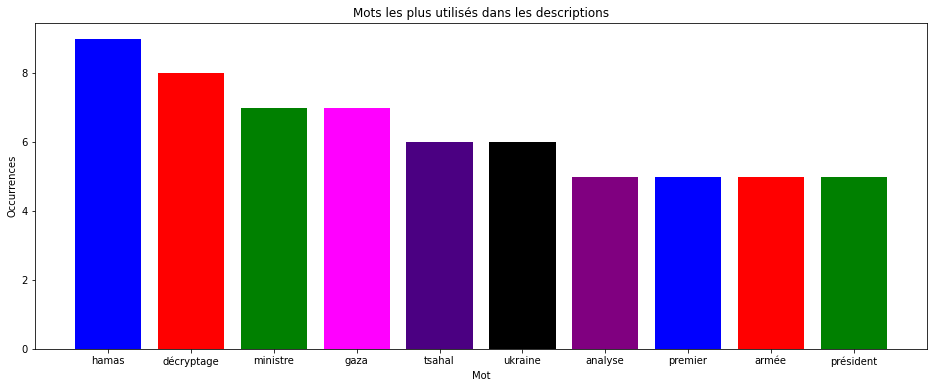

In [60]:
import matplotlib.pyplot as plt
#### Creation d'une liste de couleur à utiliser pour nos graphiques
couleur = ['blue', 'red', 'green', 'magenta', 'indigo', 'black', 'purple']

# Générer le graphique à barres
plt.figure(figsize=(16, 6))
plt.bar(df['Mot'], df['Occurrences'], color=couleur)
plt.xlabel('Mot')
plt.ylabel('Occurrences')
plt.title('Mots les plus utilisés dans les descriptions')
plt.show()

## EXERCICE 2 

### Récuperation des données à partir du site web de vente

In [83]:
## Création d'une fonction d'extraction et de pretraitement
def extract(url_site, genre):
    titre = []
    prix = []
    notes = []
    tmp=""
    text = ""
    request_text = request.urlopen(url_site).read()
    page = bs4.BeautifulSoup(request_text, 'html.parser')
    # Récuperation des titres des differents produits
    for i in range (0, len(page.findAll('div', {'class': 'product-info'}))):
        detail = page.findAll('div', {'class': 'product-info'})[i].find('a').findAll('h2')
        for j in range(0, len(detail)):
            for t in detail[j]:
                text += t.get_text()
            tmp = text + ""
        text =""
        titre.append(tmp)
        
    # Récuperation des notes des differents produits
    for i in range (0, len(page.findAll('dl', {'class': 'price__regular'}))):
        detail = page.findAll('dl', {'class': 'price__regular'})[i].find('dd').findAll('span')
        for j in range(0, len(detail)):
            for t in detail[j]:
                text += t.get_text()
            tmp = text + ""
        text =""
        prix.append(tmp)
        notes.append(round(random.uniform(1, 5),1))
    
    #Création d'un dataframe pour chaque categorie 
    df = pd.DataFrame({'Titre':titre, 'Prix': prix, 'Notes':notes, 'Type': genre}) 
    return df

In [84]:
# Récuperation des differents type de produits
chemise = extract("https://obeezi.com/collections/shirts", "Chemise")
chaussure = extract("https://obeezi.com/collections/shoes", "Chaussure")
polo = extract("https://obeezi.com/collections/polo-shirts", "Polo")
sneakers = extract("https://obeezi.com/collections/sneakers", "Sneakers")
jacket = extract("https://obeezi.com/collections/jackets", "Jacket")
jogging = extract("https://obeezi.com/collections/track-suits", "Jogging")

In [85]:
# Concaténation des différents dataframe créés
data = pd.concat([chemise, chaussure, polo, sneakers, jacket, jogging])
data

,Titre,Prix,Notes,Type
0,PRL Smart Light Weight Checkboard Button Down ...,"₦19,999.00\n",3.9,Chemise
1,PRL Smart Light Weight Checkboard Button Down ...,"₦19,999.00\n",1.8,Chemise
2,PRL Smart Light Weight Checkboard Button Down ...,"₦19,999.00\n",1.9,Chemise
3,PRL Smart Light Weight Checkboard Button Down ...,"₦19,999.00\n",4.9,Chemise
4,PRL Essential Men's Custom Fit Striped Long Sl...,"₦34,999.00\n",1.1,Chemise
...,...,...,...,...
35,DS Branded Two Piece Cotton Designed Track Sui...,"₦41,998.80\n",4.2,Jogging
36,PP Branded Two Piece Cotton Designed Track Sui...,"₦54,999.00\n",4.2,Jogging
37,FD Crested Front Side Logo Lightweight Zip D...,"₦54,999.00\n",4.0,Jogging
38,PP Branded Two Piece Cotton Designed Track Sui...,"₦41,998.80\n",1.8,Jogging


In [86]:
# Sauvegarde des données sous format csv
data.to_csv("donnees_site_vente.csv", index=False)

### CHARGEMENT, UTILISATION ET NETTOYAGE DES DONNEES DU FICHIER ENREGISTRES

In [87]:
donnees = pd.read_csv("donnees_site_vente.csv")
donnees.duplicated().sum()

0

In [88]:
# Formatage du type de donnees
donnees['Prix'] = donnees['Prix'].str.replace('.00\n', '')
donnees['Prix'] = donnees['Prix'].str.replace('.80\n', '')
donnees['Prix'] = donnees['Prix'].str.replace('.99\n', '')
donnees['Prix'] = donnees['Prix'].str.replace(',', '')
donnees['Prix'] = donnees['Prix'].str.replace('₦', '')

donnees = donnees.astype({'Prix' : float})
donnees

,Titre,Prix,Notes,Type
0,PRL Smart Light Weight Checkboard Button Down ...,19999.0,3.9,Chemise
1,PRL Smart Light Weight Checkboard Button Down ...,19999.0,1.8,Chemise
2,PRL Smart Light Weight Checkboard Button Down ...,19999.0,1.9,Chemise
3,PRL Smart Light Weight Checkboard Button Down ...,19999.0,4.9,Chemise
4,PRL Essential Men's Custom Fit Striped Long Sl...,34999.0,1.1,Chemise
...,...,...,...,...
220,DS Branded Two Piece Cotton Designed Track Sui...,41998.0,4.2,Jogging
221,PP Branded Two Piece Cotton Designed Track Sui...,54999.0,4.2,Jogging
222,FD Crested Front Side Logo Lightweight Zip D...,54999.0,4.0,Jogging
223,PP Branded Two Piece Cotton Designed Track Sui...,41998.0,1.8,Jogging


In [89]:
# Afficher les produits les moins cheres
# Effectuons d'abord un tri du dataframe par ordre croissant de prix
donnees = donnees.sort_values('Prix')

# Produit le moins cher
cat_produit_moins_cher = donnees.iloc[0]['Type']
produit_moins_cher = donnees.iloc[0]['Titre']
prix_moins_cher = donnees.iloc[0]['Prix']

# Produit le plus cher
cat_produit_plus_cher = donnees.iloc[-1]['Type']
produit_plus_cher = donnees.iloc[-1]['Titre']
prix_plus_cher = donnees.iloc[-1]['Prix']

# Affichage des résultats
print("Produit le moins cher:", produit_moins_cher, "(", cat_produit_moins_cher,")", "- Prix:", prix_moins_cher)
print("Produit le plus cher:", produit_plus_cher, "(", cat_produit_plus_cher,")", "- Prix:", prix_plus_cher)

Produit le moins cher: England Home Jersey 2022 ( Jogging ) - Prix: 14999.0
Produit le plus cher: NK Max 720 Breathable Sneakers- Black Red ( Sneakers ) - Prix: 64999.0


In [90]:
# Calcul de la moyenne des prix
moyenne = donnees['Prix'].mean()

# Calcul de la médiane des prix
mediane = donnees['Prix'].median()

# Affichage des résultats
print("Moyenne des prix:", moyenne)
print("Médiane des prix:", mediane)

Moyenne des prix: 42284.26666666667
Médiane des prix: 39999.0


In [91]:
# Examinons les notes moyennes des produits
moy_note = round(donnees.groupby('Type')['Notes'].mean(),2)
moy_note

Type
Chaussure    3.06
Chemise      3.07
Jacket       3.28
Jogging      3.34
Polo         2.81
Sneakers     3.13
Name: Notes, dtype: float64

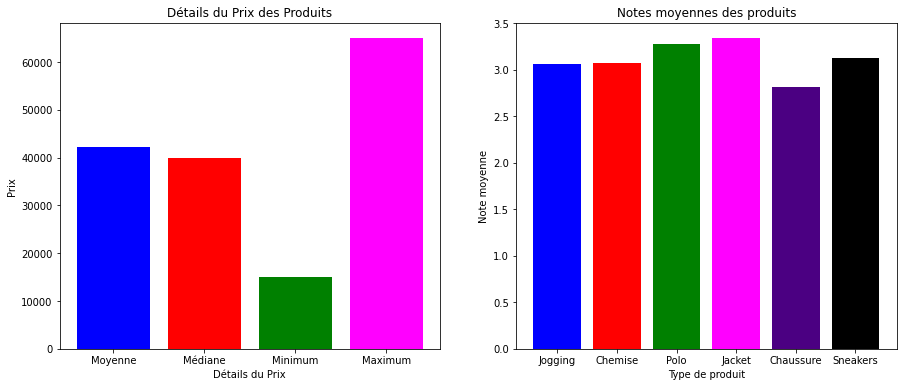

In [92]:
# Calcul des détails du prix
prix_min = donnees['Prix'].min()
prix_max = donnees['Prix'].max()

#### Creation d'une liste de couleur à utiliser pour nos graphiques
couleur = ['blue', 'red', 'green', 'magenta', 'indigo', 'black']

# Tracer le graphique du detail du prix des produits
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.bar(['Moyenne', 'Médiane', 'Minimum', 'Maximum'], [moyenne, mediane, prix_min, prix_max], color=couleur)
plt.xlabel('Détails du Prix')
plt.ylabel('Prix')
plt.title('Détails du Prix des Produits')

# Tracer pour mieux etudier les notes des produits
plt.subplot(1,2,2)
plt.bar(donnees['Type'].unique(), moy_note, color=couleur)
plt.xlabel('Type de produit')
plt.ylabel('Note moyenne')
plt.title('Notes moyennes des produits')

plt.show()